# Example of application of the sdlabb package for metadata extaction
# TF-IDF method 
Created 13-11-20

Author: Fredrik Möller 



# Step 1: Load and preprocess data.

### Currently the the sdlabb package can only handle inputs of type `list`. As the data is loaded from a `csv`-file it needs to be transformed into the correct format.

In [17]:
from alpacka.pipes import data_process

data_p = data_process.data_process('config.ini')

data , labels = data_p.load_file('text', 'label')


Loading data from ~\Documents\Recorded Future\Project-emp\Data\violence_data_nov10.csv
Dropping any NAN objects from the data
Removing any non str objects from the data


### Quick investigation of the current status of the data.

In [18]:
nr_pos = sum(labels)
prec_pos = (nr_pos/len(labels))*100
prec_neg = 100 - prec_pos 
print(f"Number of samples in Data {len(data)}")
print(f"Distrubution of the classes")
print(f"Positive class: {round(prec_pos,2)} % {nr_pos} samples")
print(f"Negative class: {round(prec_neg,2)}. {len(data)-nr_pos} samples")

Number of samples in Data 40656
Distrubution of the classes
Positive class: 4.46 % 1812 samples
Negative class: 95.54. 38844 samples


# Application of the TF-IDF method to the data:

#### Start with importing and creating an instance of the `TF-IDF` class 

The setup for the tf-idf-class is loaded based on settings specified in the 'congi.ini' file. See README for further clarification 

In [19]:
from alpacka.pipes import tfidf_pipeline



print(f"Creating TF-IDF class object")
tfidf = tfidf_pipeline.tfidf_pipeline('config.ini')
tfidf.set_verbose(False)
tfidf.num_words = None

print(f"Calculating NCOF score for the unprocessed data set")
tfidf.calc_tfidf(data, labels)
print(f"done")




Creating TF-IDF class object
Calculating NCOF score for the unprocessed data set
done


#### Currently there are no set length restrictions of the number of words that are represented. This makes it so that all unique word in the data set will be represented and get a TF-IDF score. 

#### After the `calc_tfidf` method have been called the dictionary for the data set and the vector containing the TF-IDF score can be access by calling the `get_dict` & `get_score` methods respectively


#### The more common a word is in the data set the lower its index is. Such that the most common word has index 0, the second most common has index 1, etc.

In [20]:
print(f"Accessing the 5 first elements in the dictionary for the dataset")
d = tfidf.get_dict()
print([d.get(i) for i in range(6)])
print("")
print(f"Accessing the corresponding TF-IDF score for these words in the negative class ")
s_neg = tfidf.get_score()
print(s_neg[0][range(6)])
print(" ")
print(f"Accessing the corresponding TF-IDF score for these words in the positive class ")
s_pos = tfidf.get_score()
print(s_pos[1][range(6)])

Accessing the 5 first elements in the dictionary for the dataset
['00', '000', '000mg', '005', '00under', '01']

Accessing the corresponding TF-IDF score for these words in the negative class 
[0.34383833 0.20361618 0.26697807 0.22943799 0.33486468 0.20227147]
 
Accessing the corresponding TF-IDF score for these words in the positive class 
[0.         0.35071529 0.         0.         0.         0.        ]


### Next step is to extract the words with the NCOF-scores that lie  𝜇±1−3𝜎 , (mean plus minus 1 to 3 standard deviations).
These outliers are sorted such that the words that lie inside each sigma bracked are grouped with eachother. This step is performed by caling the `.split_score()` method.

In [21]:
tfidf.split_score()

### To extract the words that are identified as outliers in only the positive class or the negative class the symetric set difference need to be taken. 
This is done by calling the `.unique_outliers_per_class()` method. Will return a bound field in the class object that contains the indexes of the outliers. The indexes can be acessed by calling `.get_outliers_unique_pos()` and `.get_outliers_unique_neg()` from the class. 

In [23]:
tfidf.unique_outliers_per_class()


### Now that the tf-idf results for the data set have been produced and the outliers identified and seperated plots can now be produced. 

<Figure size 576x396 with 0 Axes>

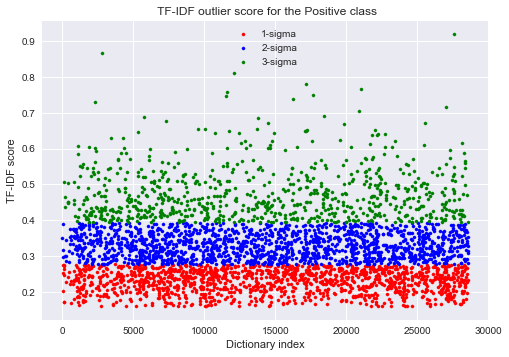

<Figure size 576x396 with 0 Axes>

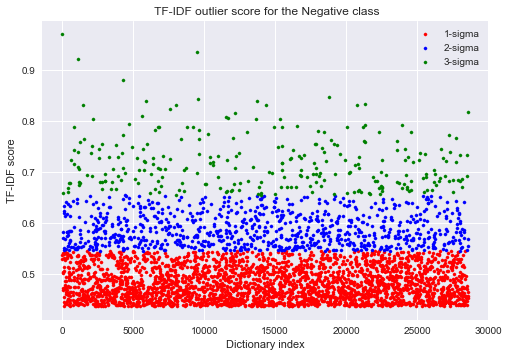

In [31]:
tfidf.plot_outliers(tfidf.get_score()[1], tfidf.get_outliers_unique_pos(), 'Positive')

tfidf.plot_outliers(tfidf.get_score()[0], tfidf.get_outliers_unique_neg(), 'Negative')

### Histograms over the tfidf score can also be plotted

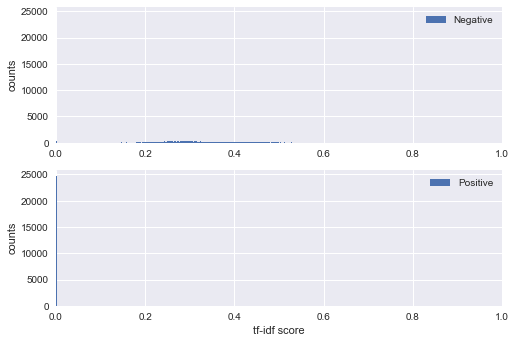

In [37]:
tfidf.plot_merged_histogram(tfidf.get_score(), x_label = 'tf-idf score', y_label= 'counts', legend= ['Negative', 'Positive'])

### To remove stop words from the identified outliers start by loading them using the data process class

In [39]:
stop_words = data_p.load_stop_words(nr_words = 200)
nr = 10
print(f"The {nr} most commonly used words are {stop_words[:nr]}")

Loading 200 stop words from Stopord.txt
The 10 most commonly used words are ['i', 'och', 'att', 'det', 'som', 'en', 'på', 'är', 'av', 'för']


### Convert the outlier indexes to words and remove stop words 
Since the outliers are imported as txet words, the identified outlier indexes must be converted from integers to texts.
This can be done by calling `ind_2_txt()`. 


In [40]:
print(f"Converting and removing stop words from outliers originating from the positive class")
text_outliers = tfidf.ind_2_txt(tfidf.get_outliers_unique_pos())
words_pos_no_stop_words = tfidf.remove_stop_words(text_outliers,stop_words)
print(f"Converting and removing stop words from outliers originating from the negative class")
text_outliers = tfidf.ind_2_txt(tfidf.get_outliers_unique_neg())
words_neg_no_stop_words = tfidf.remove_stop_words(text_outliers,stop_words)

Converting and removing stop words from outliers originating from the positive class
Converting and removing stop words from outliers originating from the negative class


### Saving the outliers in txt files 

In [16]:
path =r"C:\Users\Fredrik Möller\Documents\Recorded Future\Project-emp\Lists\TF-IDF"

print(f"Saving positive outliers")
TFIDF.save_2_file(path + "/pos_1Simga.txt", words_pos_no_stop_words[0])
TFIDF.save_2_file(path + "/pos_2Simga.txt", words_pos_no_stop_words[1])
TFIDF.save_2_file(path + "/pos_3Simga.txt", words_pos_no_stop_words[2])

print(f"Saving negative outliers")
TFIDF.save_2_file(path + "/neg_1Simga.txt", words_neg_no_stop_words[0])
TFIDF.save_2_file(path + "/neg_2Simga.txt", words_neg_no_stop_words[1])
TFIDF.save_2_file(path + "/neg_3Simga.txt", words_neg_no_stop_words[2])


Saving positive outliers
Saving negative outliers
